`* This project is a part of an assignment given by upGrad and IIITB * `

## Introduction

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 
They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

#### Business Goal 

To model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

#### Lets start with importing the libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)

## Step 1: Reading, Understanding and cleaning the Data

### 1.1 Reading and understanding

In [2]:
cars_data = pd.read_csv('CarPrice_Assignment.csv')
cars_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
cars_data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [4]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [5]:
cars_data.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [6]:
cars_data.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [7]:
#check for missing values in rows
sum(cars_data.isnull().sum(axis=1))

0

In [8]:
#check for missing values in columns
cars_data.isnull().sum(axis=0)

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

There is no missing values in the data and therefore, we can proceed further.

In [9]:
#check for duplicate rows and drop it if any
cars_data = cars_data.drop_duplicates()

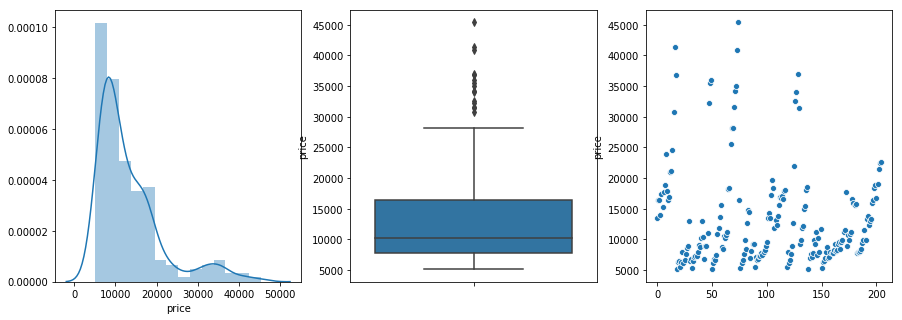

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64
Median of Price = 10295.0


In [10]:
#check for outliers of target variable - 'price'
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.distplot(cars_data['price'])
plt.subplot(1,3,2)
sns.boxplot(y = 'price',data=cars_data)
plt.subplot(1,3,3)
sns.scatterplot(x=cars_data.index,y = 'price',data=cars_data)
plt.show()
#plt.tight_layout(False)
print(cars_data['price'].describe())
print("Median of Price = {}".format(cars_data['price'].median()))

Observation from the above plots and data: 
  - The distribution of price is a little skewed towards right due to the presence of outliers. 
  - Outliers are mostly greater than 30000
  - most cars are prices between 7788 to 16503.

As the data points are very less for the model, therefore keeping the outliers as of now and not deleting it. 
The scaling of the variables might handle this scenario. 

### 1.2 Cleaning data

In [11]:
cars_data['CarName'].head()

0          alfa-romero giulia
1         alfa-romero stelvio
2    alfa-romero Quadrifoglio
3                 audi 100 ls
4                  audi 100ls
Name: CarName, dtype: object

We noticed that CarName is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. So the next step will be to extract car company and rectify the mis-spelled car comapany names 

In [12]:
cars_data['carCompany'] =  cars_data['CarName'].str.split(' ',expand=True)[0]

In [13]:
cars_data['carCompany'].value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
volvo          11
peugeot        11
dodge           9
volkswagen      9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
jaguar          3
alfa-romero     3
chevrolet       3
renault         2
vw              2
maxda           2
vokswagen       1
mercury         1
Nissan          1
porcshce        1
toyouta         1
Name: carCompany, dtype: int64

From the above result we observe that:

- mazda is incorrectly spelled as maxda in 2 places
- toyota is incorrectly spelled as toyouta in 1 place
- nissan is spelled as Nissan in 1 place
- volkswagen is incorrectly spelled as vokswagen in 1 place and vw in 2 places
- porsche is incorrectly spelled as porcshce in 1 place

Need to rectify the above car names in order to maintain consistency.


In [14]:
cars_data['carCompany'] = cars_data['carCompany'].replace({'maxda':'mazda','toyouta':'toyota','Nissan':'nissan','vokswagen':'volkswagen','vw':'volkswagen','porcshce':'porsche'})
cars_data['carCompany'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
volvo          11
peugeot        11
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
renault         2
mercury         1
Name: carCompany, dtype: int64

In [15]:
## Checking the data types and convert to proper data types as per the data dictionary
cars_data.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
carCompany           object
dtype: object

As per the data dictionary symboling is a categorical variable.
- We observe that 'symboling' is of type `int` whereas all other categorical variables are of type `object`. 
- It should be converted to str otherwise it will be treated as numerical variable by default.

In [16]:
# changing the type of column symboling 
cars_data['symboling'] = cars_data['symboling'].astype(str)
#cars_data.dtypes

In [17]:
#drop irrelevant columns - 
#Dropping column car_ID as it is just the identity and will not help in predicting the price.
#Dropping carName as carCompany 
cars_data.drop(['car_ID','CarName'],axis=1,inplace=True)
cars_data.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'carCompany'],
      dtype='object')

## Step 2: EDA and Visualizing the data

### 2.1 Visualizing categorical variables

In [18]:
# As per data dictionary following cols are categorical
catCols = ['symboling','fueltype', 'aspiration', 'doornumber','carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber','fuelsystem','carCompany']
len(catCols)

11

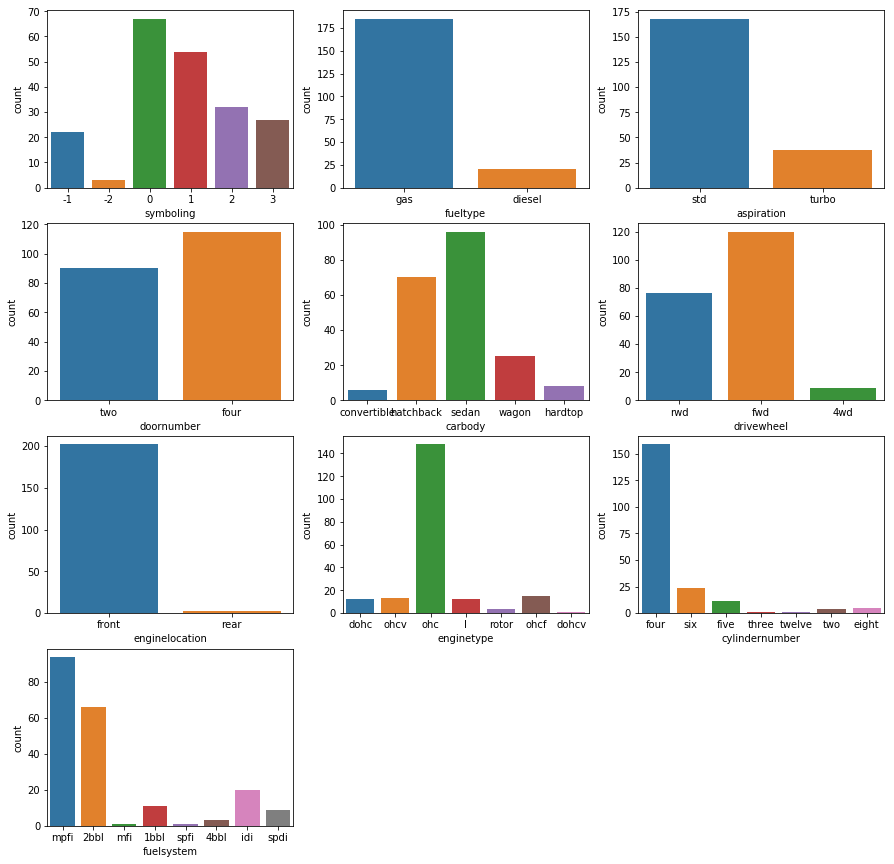

In [19]:
def countplot_catVariables(cols):
    plt.figure(figsize=(15, 15))
    for i in range(0,len(cols)):
        plt.subplot(4,3,i+1)
        sns.countplot(x = cols[i], data = cars_data)
    plt.show()
    
countplot_catVariables(catCols[:-1])

In [20]:
cars_data['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

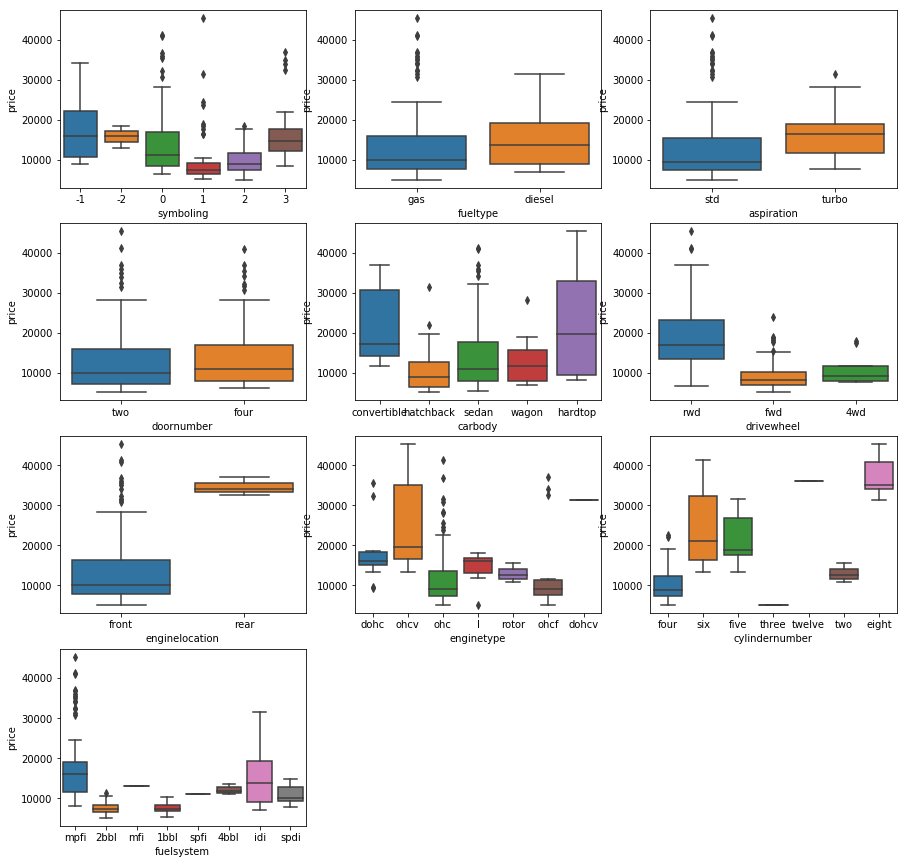

In [21]:
def boxplot_catVariables(cols):
    plt.figure(figsize=(15, 15))
    for i in range(0,len(cols)):
        plt.subplot(4,3,i+1)
        sns.boxplot(x = cols[i], y = 'price', data = cars_data)
    plt.show()
    
boxplot_catVariables(catCols[:-1])


Few Observations from the above count plots and the respective pricing of the particular category:
- Fueltype `gas` is the prefered feature and its median price is lower as compared to fueltype `diesel`.
- carbody `sedan` and `hatchback` are the top two preferred carbody. Although there is not much difference in the pricing of sedan and wagon, still sedan is preferred. Therefore, carbody doesnt seem to affect the price.
- enginelocation seems to directly affect the price of car. `rear` engine location is least preferrefg and is highly priced.
- aspiration affects the price to some extent. `std` aspiration is the preferred one and its median price is far less than the `turbo`
- cylindernumber also affects the price with `3` and `4` having the least price and `8` the maximum.
- the drivewheel and enginetype also seems to have an impact on the price to a certain extent.
- We do observe outliers in some cases
On an average features which contributes less towards price are the prefered ones among the car companies. 
We notice that the above few features have an impact on the price. We will be considering these and confirming the significance of these features in the model building process.


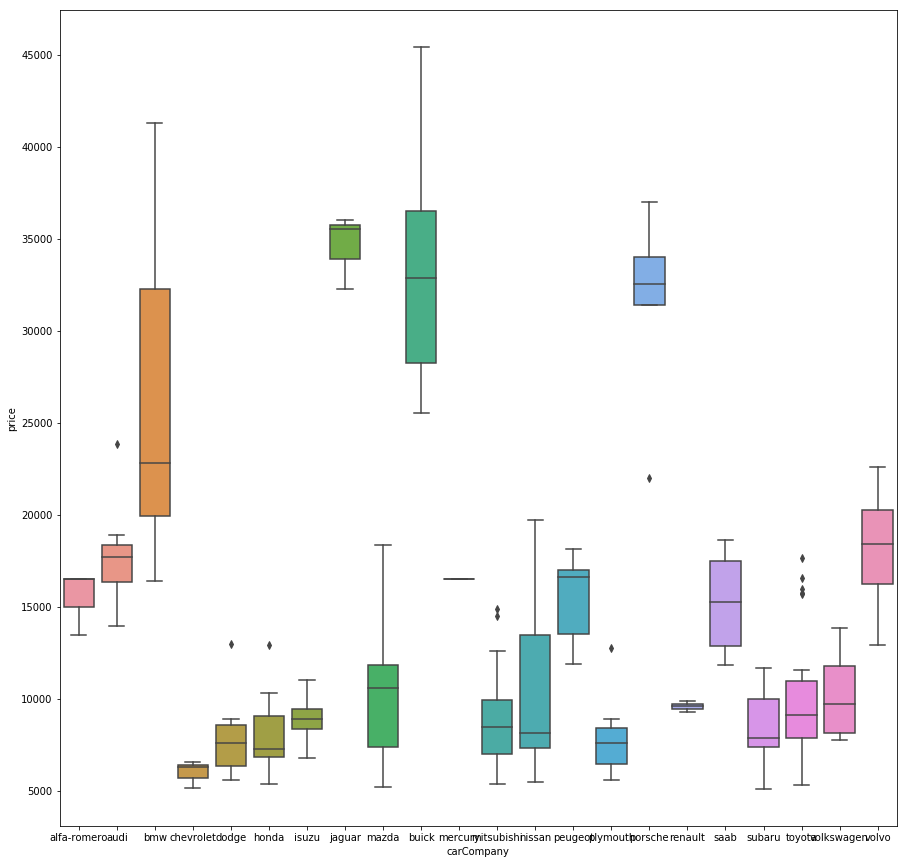

<Figure size 1440x720 with 0 Axes>

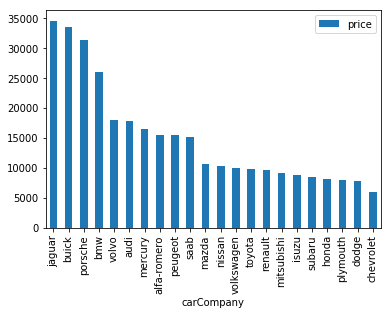

In [22]:
#checking the categorical variable carCompany.
plt.figure(figsize=(15, 15))
sns.boxplot(x ='carCompany', y = 'price', data = cars_data)
plt.figure(figsize=(20,10))
pd.DataFrame(cars_data.groupby(['carCompany'])['price'].mean()).sort_values(by='price',ascending=False).plot.bar()

Few Observations 
- `jagua`,`buick`,`porche` are highly piced cars.



In [23]:
## parallel visualization of categorical variables using hue

#### Observations:

### 2.2 Visualizing numerical variables

In [24]:
numCols = ['price','wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize','boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg']

len(numCols)

14

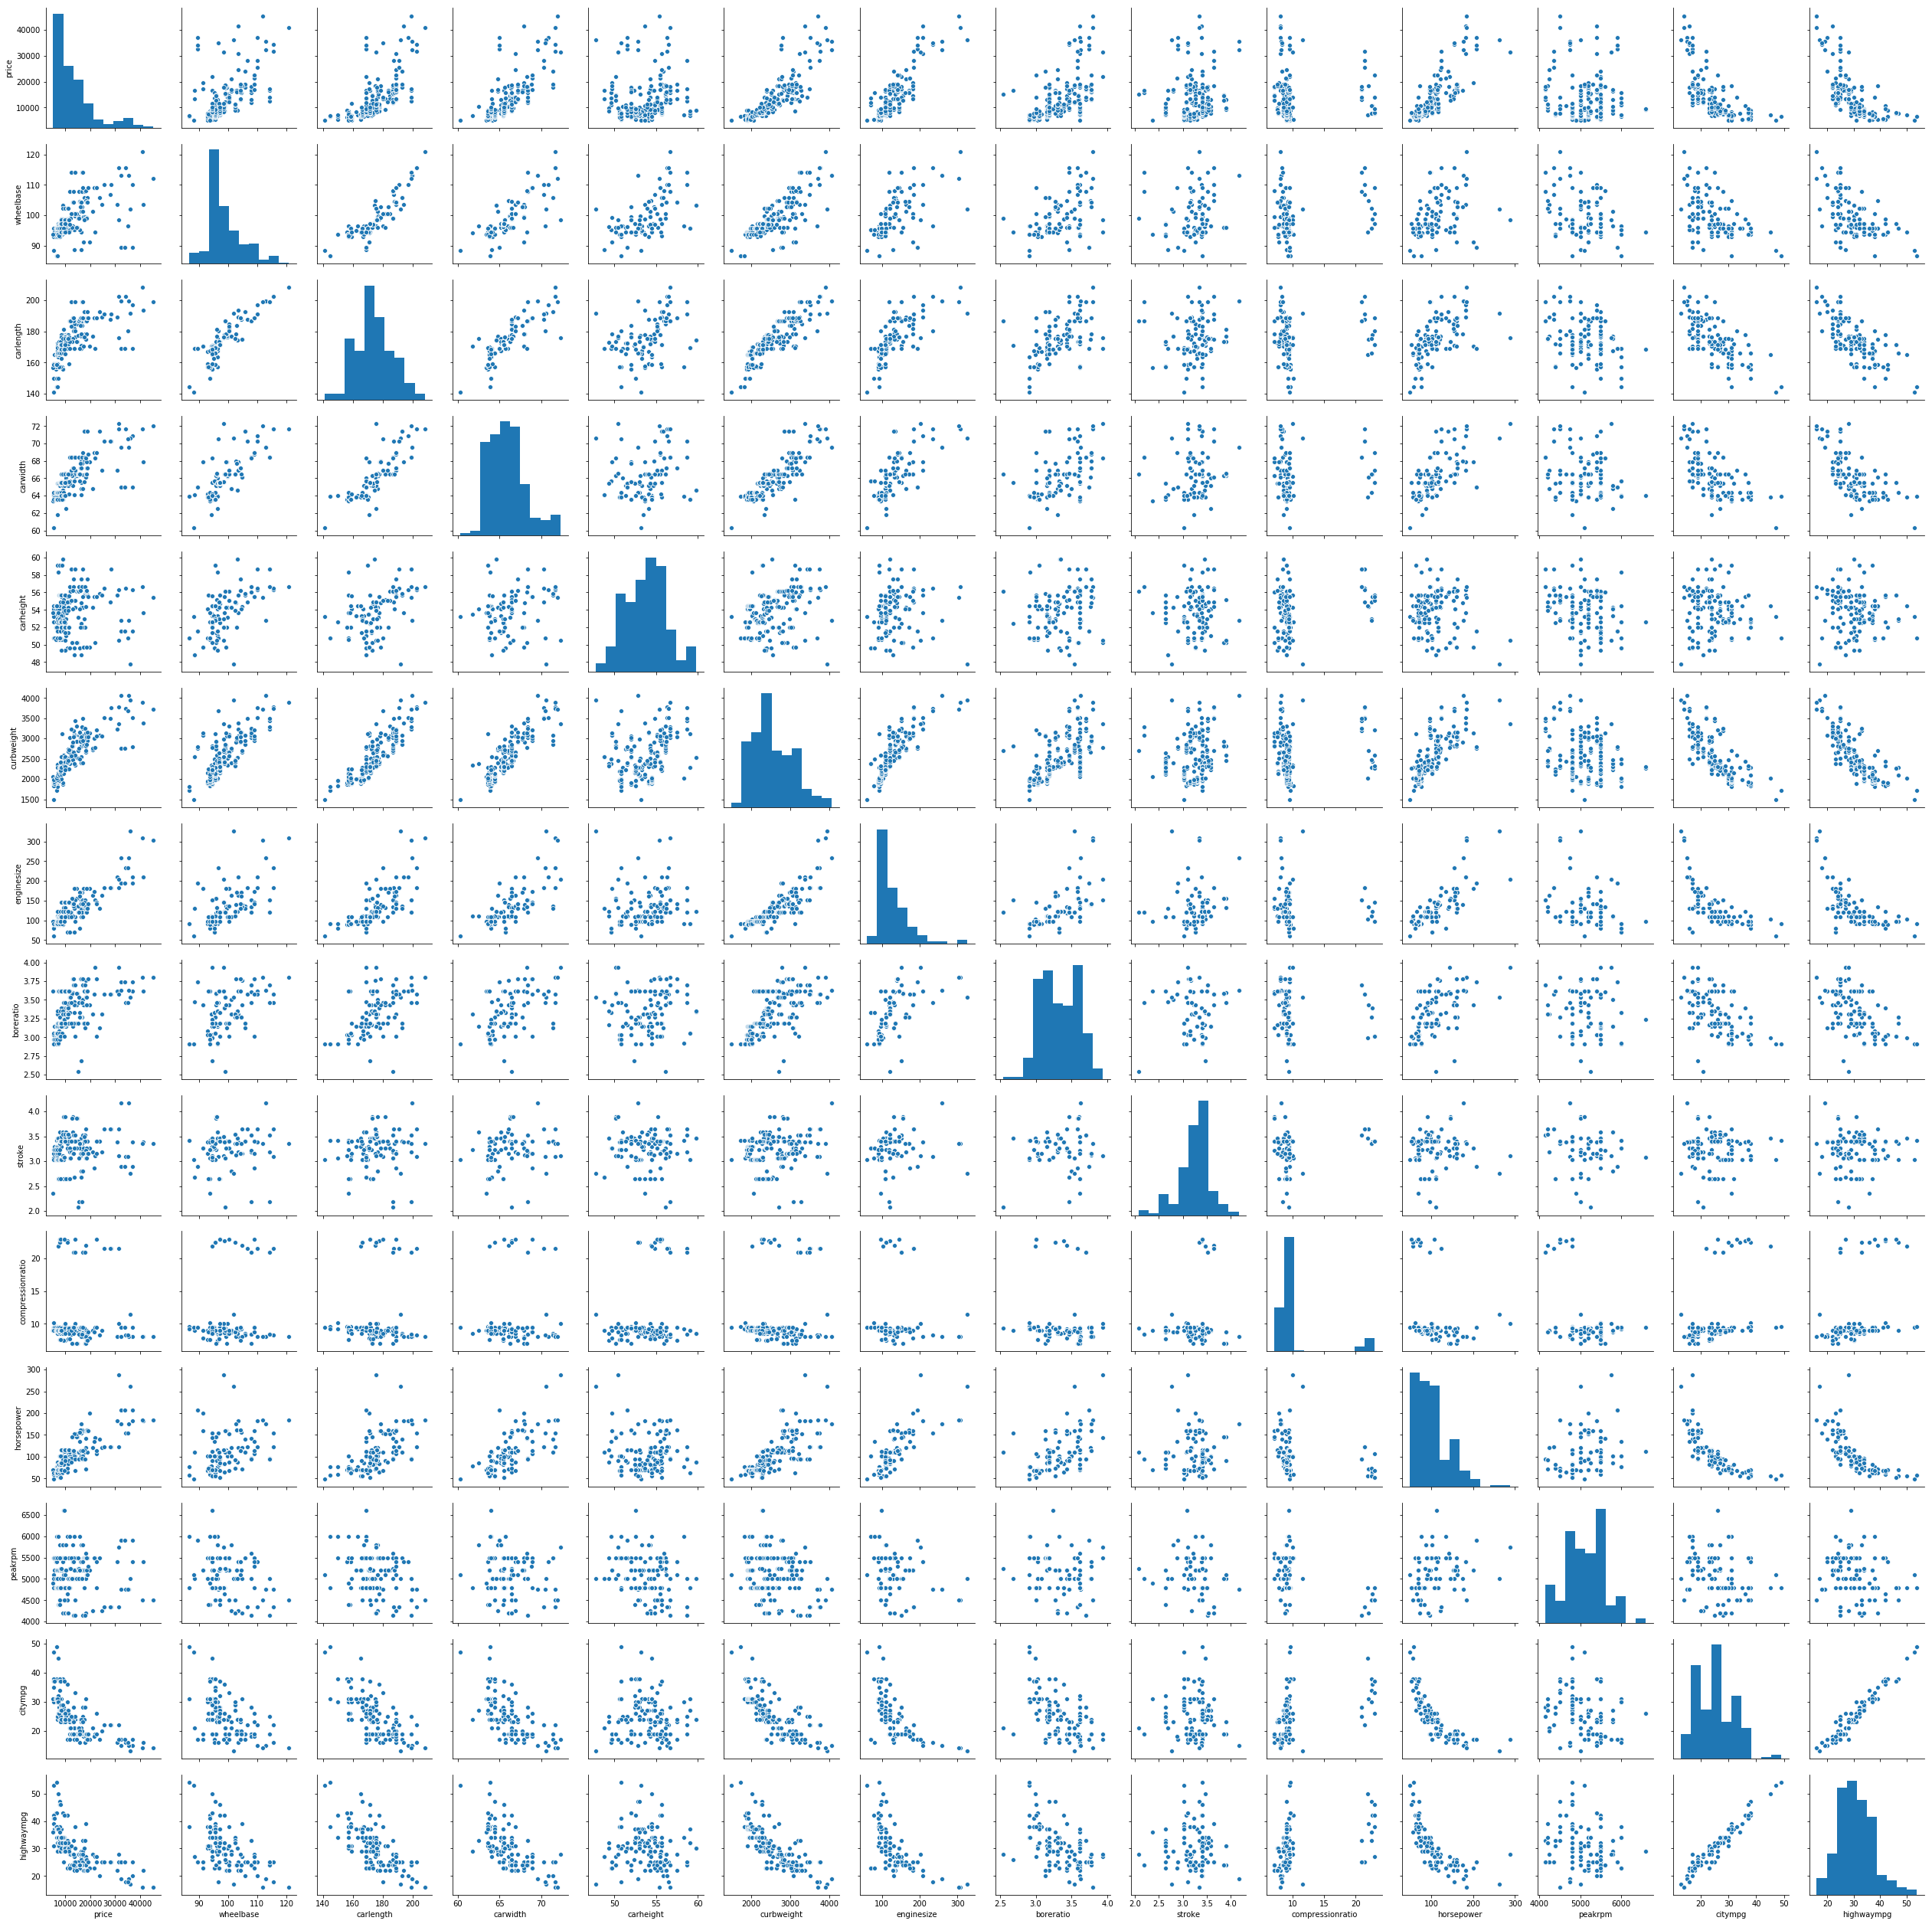

In [25]:
sns.pairplot(cars_data[numCols])

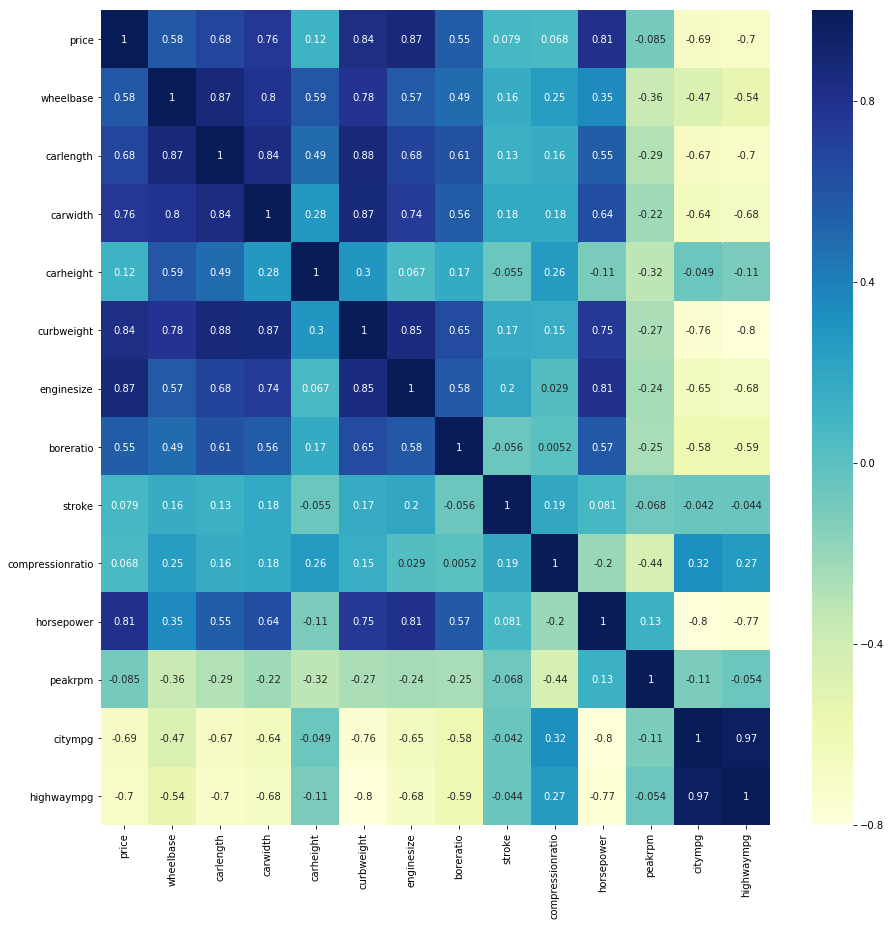

In [26]:
cars_data_corr = cars_data[numCols].corr()
plt.figure(figsize=(15,15))
sns.heatmap(cars_data_corr,annot=True,cmap='YlGnBu')
plt.show()

Observations:
Features that show a high positive corelation with price are`horsepower`,`enginesize`,`curbweight`,`carwidth`,`carlength` and `wheelbase`
Features that show a negative corelation with price are`highwaympg`,`citympg`

We also see some multicolinearlity between the features.
-  curbweight is highly corelated with most of the other features
- wheelbase is highly corelated with carlength and carwidth.
- enginesize is highly corelated with horsepower and curbweight.
- citympg and highwaympg are very highly corelated.

The above information will be usefull in selecting the features for modeling.

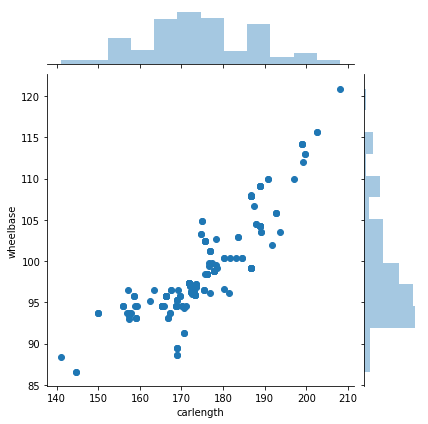

In [27]:
sns.jointplot(x="carlength", y="wheelbase", data=cars_data)

## 3. Data Preparation

### 3.1 Adding Derived variables

In [28]:
# we notice that there is carlength and wheelbase are highly corelated. As per business knowledge this is 
# because wheelbase which is the distance between the center of fron and rear wheel highly depends on the length of the car.
# Lets reduce these two variables to one by taking the ratio.

cars_data['carLenWheelRatio'] = cars_data['carlength']/cars_data['wheelbase']
numCols.remove('carlength')
numCols.remove('wheelbase')
numCols.append('carLenWheelRatio')
cars_data.drop(['wheelbase'],axis=1,inplace=True)


In [29]:
cars_data['carCompany'].nunique()

22

We notice that there are 22 different car companies. Creating dummies and modeling with this huge number will not be beneficial as compared to segments of car companies. 
Therefore, to reduce the number of categories in 'carCompany' categorical variable, we decide to divide the car companies to segments based on the mean price

In [30]:
company_mean = pd.DataFrame(cars_data.groupby(['carCompany'])['price'].mean()).sort_values(by='price',ascending=False)
company_mean.loc['alfa-romero']['price']

15498.333333333334

Based on the above table, we decide to segment car companies as per the following
- mean price<= 10000 - lower_priced
- mean price >10000 and <20000 middle_priced
- mean price >20000 luxury_priced

In [31]:
def map_car_segment(x):
    mean_value = company_mean.loc[x]['price']
    result = ""
    if mean_value>20000:
        result = "luxury_priced"
    elif mean_value>10000 and mean_value<=20000:
        result = "middle_priced"
    else:
        result = "lower_priced"
    return(result)

cars_data['carSegment'] = cars_data['carCompany'].apply(lambda x:map_car_segment(x))
cars_data[['carCompany','carSegment']] 

,carCompany,carSegment
0,alfa-romero,middle_priced
1,alfa-romero,middle_priced
2,alfa-romero,middle_priced
3,audi,middle_priced
4,audi,middle_priced
5,audi,middle_priced
6,audi,middle_priced
7,audi,middle_priced
8,audi,middle_priced
9,audi,middle_priced


In [32]:
#updating categorical cols by dropping carCompany and adding car_segment
cars_data.drop('carCompany',axis=1,inplace=True)
catCols.remove('carCompany')
catCols.append('carSegment')
cars_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carwidth,carheight,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carLenWheelRatio,carSegment
0,3,gas,std,two,convertible,rwd,front,168.8,64.1,48.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,1.905192,middle_priced
1,3,gas,std,two,convertible,rwd,front,168.8,64.1,48.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,1.905192,middle_priced
2,1,gas,std,two,hatchback,rwd,front,171.2,65.5,52.4,...,2.68,3.47,9.0,154,5000,19,26,16500.0,1.811640,middle_priced
3,2,gas,std,four,sedan,fwd,front,176.6,66.2,54.3,...,3.19,3.40,10.0,102,5500,24,30,13950.0,1.769539,middle_priced
4,2,gas,std,four,sedan,4wd,front,176.6,66.4,54.3,...,3.19,3.40,8.0,115,5500,18,22,17450.0,1.776660,middle_priced


In [33]:
cars_data.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'carLenWheelRatio',
       'carSegment'],
      dtype='object')

### 3.2 Creating dummy variables

In [34]:
#checking for binary and dummy variables
cars_data[catCols].nunique().sort_values()

fueltype          2
aspiration        2
doornumber        2
enginelocation    2
drivewheel        3
carSegment        3
carbody           5
symboling         6
enginetype        7
cylindernumber    7
fuelsystem        8
dtype: int64

In [35]:
cars_data[catCols].head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,carSegment
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,middle_priced
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,middle_priced
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,middle_priced
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,middle_priced
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,middle_priced


- We observed that there is not Yes/No values in categorical variables. Therefore, not using map function to mark as 0 or 1, instead using get_dummies on all the categorical columns

In [36]:
#getting dummy variables for all categorical columns and dropping the first category as it will be redundant.
status = pd.get_dummies(cars_data[catCols],drop_first=True)
cars_data=pd.concat([cars_data,status],axis=1)
cars_data.drop(catCols,axis=1,inplace=True)

In [37]:
cars_data.columns

Index(['carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price', 'carLenWheelRatio', 'symboling_-2',
       'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3',
       'fueltype_gas', 'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'carSegment_luxury_priced',
       'carSegment_middle_priced'],
      dtype=

## 4. Creating Training and Testing Sets and scaling the features

### 4.1 Dividing the data into train and test set

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
np.random.seed(0)
cars_train, cars_test = train_test_split(cars_data,train_size=0.8,test_size=0.2,random_state=100)

In [40]:
print(cars_train.shape)
print(cars_test.shape)
cars_train.head()

(164, 50)
(41, 50)


,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,carSegment_luxury_priced,carSegment_middle_priced
3,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,...,0,0,0,0,0,1,0,0,0,1
157,166.3,64.4,52.8,2109,98,3.19,3.03,9.0,70,4800,...,0,1,0,0,0,0,0,0,0,0
81,173.0,65.4,49.4,2328,122,3.35,3.46,8.5,88,5000,...,0,1,0,0,0,0,0,0,0,0
32,150.0,64.0,52.6,1837,79,2.91,3.07,10.1,60,5500,...,0,0,0,0,0,0,0,0,0,0
99,173.4,65.2,54.7,2324,120,3.33,3.47,8.5,97,5200,...,0,1,0,0,0,0,0,0,0,1


### 4.2 Applying minMax scaler on numeric variables

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
scaler = MinMaxScaler()
cars_train[numCols] = scaler.fit_transform(cars_train[numCols])

In [43]:
cars_train.describe().T

,count,mean,std,min,25%,50%,75%,max
carlength,164.0,173.073780,12.155540,141.1,166.300000,172.000000,178.925000,202.6
carwidth,164.0,0.454726,0.179980,0.0,0.308333,0.425000,0.516667,1.0
carheight,164.0,0.482927,0.205820,0.0,0.341667,0.491667,0.641667,1.0
curbweight,164.0,0.398579,0.202330,0.0,0.247673,0.347944,0.522789,1.0
enginesize,164.0,0.236493,0.148945,0.0,0.135849,0.184906,0.287736,1.0
boreratio,164.0,0.489983,0.203913,0.0,0.293651,0.468254,0.682540,1.0
stroke,164.0,0.542159,0.153546,0.0,0.464646,0.555556,0.616162,1.0
compressionratio,164.0,0.202866,0.255795,0.0,0.098437,0.125000,0.150000,1.0
horsepower,164.0,0.221037,0.164011,0.0,0.090625,0.183333,0.283333,1.0
peakrpm,164.0,0.400448,0.192302,0.0,0.265306,0.428571,0.551020,1.0


We confirmed that the values of all the features have been scaled between 0 and 1

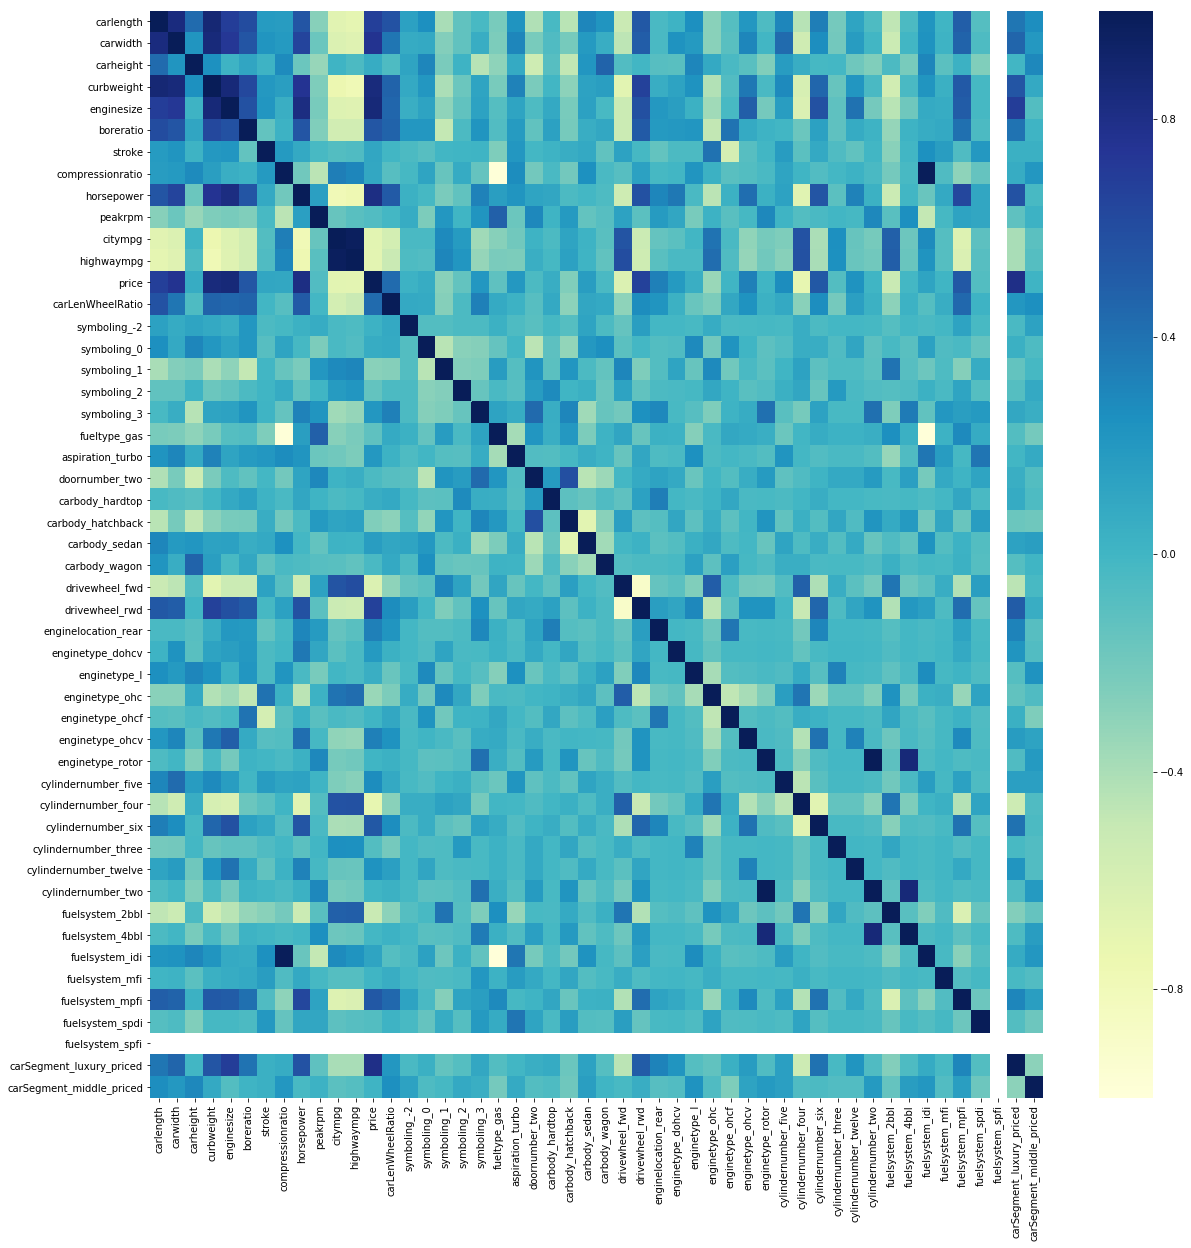

In [44]:
plt.figure(figsize = (20,20))
sns.heatmap(cars_train.corr(),cmap = 'YlGnBu')
plt.show()

In [45]:
#checking corelations among different features
corr_matrix = cars_train.corr()
cars_train_corr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
cars_train_corr = cars_train_corr.unstack().reset_index()
cars_train_corr.columns =['Feature_1','Feature_2','correlation']
cars_train_corr.dropna(subset=['correlation'],inplace=True)
cars_train_corr = cars_train_corr.sort_values(by=['correlation'],ascending=False)
cars_train_corr

,Feature_1,Feature_2,correlation
2034,cylindernumber_two,enginetype_rotor,1.000000
2157,fuelsystem_idi,compressionratio,0.985047
560,highwaympg,citympg,0.972878
150,curbweight,carlength,0.876835
203,enginesize,curbweight,0.864155
2134,fuelsystem_4bbl,enginetype_rotor,0.863332
2140,fuelsystem_4bbl,cylindernumber_two,0.863332
604,price,enginesize,0.863011
151,curbweight,carwidth,0.859037
603,price,curbweight,0.845345


The above sorted table of corelations among feature will help us in eliminating feature in the modeling process.

In [46]:
#checking the corelation of price with all other variables
cars_train_corr[(cars_train_corr['Feature_2'] == 'price') | (cars_train_corr['Feature_1'] == 'price')]

,Feature_1,Feature_2,correlation
604,price,enginesize,0.863011
603,price,curbweight,0.845345
608,price,horsepower,0.812608
2412,carSegment_luxury_priced,price,0.800009
601,price,carwidth,0.762071
600,price,carlength,0.684234
1362,drivewheel_rwd,price,0.664165
605,price,boreratio,0.544209
2262,fuelsystem_mpfi,price,0.535101
1862,cylindernumber_six,price,0.531981


In [47]:
cars_train['enginetype_dohcv'].sum()

1

-  `enginesize`, `curbweight` and `horsepower` have a high positive corelation with price.
-  `drivewheel_fwd`,`highwaympg` and `cylindernumber_four` have a high negative corelation with price
-  `drivewheel_rwd` have a somewhat middle corelation with price.

In [48]:
#Dividing into X and y sets
y_train = cars_train.pop('price')
X_train = cars_train

## 5. Building the linear model

### 5.1 Using RFE to select initial 10 features

In [49]:
from sklearn.feature_selection import RFE 
from sklearn.linear_model  import LinearRegression

In [50]:
#starting with RFE to reduce the count of feature to 10. 
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,10)
rfe = rfe.fit(X_train, y_train)

In [51]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('carlength', False, 39),
 ('carwidth', True, 1),
 ('carheight', False, 26),
 ('curbweight', True, 1),
 ('enginesize', False, 2),
 ('boreratio', False, 12),
 ('stroke', False, 4),
 ('compressionratio', False, 24),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('citympg', True, 1),
 ('highwaympg', False, 38),
 ('carLenWheelRatio', False, 27),
 ('symboling_-2', False, 5),
 ('symboling_0', False, 34),
 ('symboling_1', False, 37),
 ('symboling_2', False, 36),
 ('symboling_3', False, 21),
 ('fueltype_gas', False, 22),
 ('aspiration_turbo', False, 16),
 ('doornumber_two', False, 35),
 ('carbody_hardtop', False, 8),
 ('carbody_hatchback', False, 10),
 ('carbody_sedan', False, 11),
 ('carbody_wagon', False, 9),
 ('drivewheel_fwd', False, 33),
 ('drivewheel_rwd', False, 20),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 28),
 ('enginetype_ohc', False, 7),
 ('enginetype_ohcf', False, 18),
 ('enginetype_ohcv', False, 13),
 ('enginetype_rotor', Fa

In [52]:
rfeCols = list(X_train.columns[rfe.support_])
rfeCols

['carwidth',
 'curbweight',
 'horsepower',
 'peakrpm',
 'citympg',
 'enginelocation_rear',
 'enginetype_dohcv',
 'cylindernumber_three',
 'cylindernumber_twelve',
 'carSegment_luxury_priced']

### 5.2 Building linear model using statsmodel

In [53]:
# Creating a generic function to be used in case of remodeling 
import statsmodels.api as sm 

def buildLMModel(colsList):
    X_train_new = X_train[colsList]
    X_train_new = sm.add_constant(X_train_new)
    lm= sm.OLS(y_train,X_train_new).fit()
    return [X_train_new,lm]

In [54]:
[X_train_1,lm] = buildLMModel(rfeCols)
#X_train_1.head()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     202.5
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           7.08e-83
Time:                        08:15:33   Log-Likelihood:                 239.58
No. Observations:                 164   AIC:                            -457.2
Df Residuals:                     153   BIC:                            -423.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

- So here we got our first model with `R-squared as 0.930` and `Adj. R-squared as 0.925`

- We do notice that there are some insignificant features with p-value >0.005. 

Lets take a look at the VIFs for our first model.

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs for the new model
def getVIFs(X_train):
    X_train_new = X_train.drop(['const'], axis=1)
    vif = pd.DataFrame()
    X = X_train_new
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [56]:
getVIFs(X_train_1)

,Features,VIF
1,curbweight,36.86
0,carwidth,31.87
2,horsepower,18.51
3,peakrpm,6.28
4,citympg,4.60
9,carSegment_luxury_priced,1.98
6,enginetype_dohcv,1.55
5,enginelocation_rear,1.49
8,cylindernumber_twelve,1.26
7,cylindernumber_three,1.11


Observations:
    We notice that there are three features `horsepower`, `carwidth` and `curbweight` whose Vif are significantly higher.

Will follow the following rule while dropping the features

- High p-value High VIF : Drop the variable
- High p-value Low VIF or Low p-value High VIF : Drop the variable with high p-value first
- Low p-value Low VIF : accept the variable

### 5.3 Dropping columns and re-evaluating the model

<b> Model 2: dropping `cylindernumber_twelve` based on high p-value

In [57]:
colsList_2 = []
colsList_2.extend(rfeCols)
colsList_2.remove('cylindernumber_twelve')
[X_train_2,lm2] = buildLMModel(colsList_2)
#X_train_1.head()
print(lm2.summary())
print(getVIFs(X_train_2))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     224.3
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           9.06e-84
Time:                        08:15:34   Log-Likelihood:                 238.85
No. Observations:                 164   AIC:                            -457.7
Df Residuals:                     154   BIC:                            -426.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

<b> Model 3: dropping `citympg` based on high p-value

In [58]:
colsList_3 = []
colsList_3.extend(colsList_2)
colsList_3.remove('citympg')
colsList_3
[X_train_3,lm3] = buildLMModel(colsList_3)
#X_train_1.head()
print(lm3.summary())
print(getVIFs(X_train_3))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     250.9
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.34e-84
Time:                        08:15:34   Log-Likelihood:                 237.91
No. Observations:                 164   AIC:                            -457.8
Df Residuals:                     155   BIC:                            -429.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

<b> Model 4: dropping `peakrpm` based on p-value

In [59]:
colsList_4 = []
colsList_4.extend(colsList_3)
colsList_4.remove('peakrpm')
[X_train_4,lm4] = buildLMModel(colsList_4)
#X_train_1.head()
print(lm4.summary())
print(getVIFs(X_train_4))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     282.0
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           4.04e-85
Time:                        08:15:34   Log-Likelihood:                 236.14
No. Observations:                 164   AIC:                            -456.3
Df Residuals:                     156   BIC:                            -431.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

<b>All features are significant. Based on the VIF table Lets drop the `curbweight`.

<b> Model 5: dropping `curbweight` 

In [60]:
colsList_5 = []
colsList_5.extend(colsList_4)
colsList_5.remove('curbweight')
[X_train_5,lm5] = buildLMModel(colsList_5)
#X_train_1.head()
print(lm5.summary())
print(getVIFs(X_train_5))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     285.7
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           8.79e-82
Time:                        08:15:34   Log-Likelihood:                 225.02
No. Observations:                 164   AIC:                            -436.0
Df Residuals:                     157   BIC:                            -414.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

<b> Model 6: dropping `horsepower` based on high vif

In [61]:
colsList_6 = []
colsList_6.extend(colsList_5)
colsList_6.remove('horsepower')
[X_train_6,lm6] = buildLMModel(colsList_6)
#X_train_1.head()
print(lm6.summary())
print(getVIFs(X_train_6))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     215.2
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           1.33e-68
Time:                        08:15:34   Log-Likelihood:                 190.36
No. Observations:                 164   AIC:                            -368.7
Df Residuals:                     158   BIC:                            -350.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

<b> Model 7: dropping `cylindernumber_three` based on high p-value

In [62]:
colsList_7 = []
colsList_7.extend(colsList_6)
colsList_7.remove('cylindernumber_three')
[X_train_7,lm7] = buildLMModel(colsList_7)
#X_train_1.head()
print(lm7.summary())
print(getVIFs(X_train_7))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     265.2
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           3.12e-69
Time:                        08:15:34   Log-Likelihood:                 188.89
No. Observations:                 164   AIC:                            -367.8
Df Residuals:                     159   BIC:                            -352.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

<b> Model 8: dropping `enginetype_dohcv` based on high p-value

In [63]:
colsList_8 = []
colsList_8.extend(colsList_7)
colsList_8.remove('enginetype_dohcv')
[X_train_8,lm8] = buildLMModel(colsList_8)
#X_train_1.head()
print(lm8.summary())
print(getVIFs(X_train_8))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     349.0
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           5.91e-70
Time:                        08:15:34   Log-Likelihood:                 187.50
No. Observations:                 164   AIC:                            -367.0
Df Residuals:                     160   BIC:                            -354.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

<b>The above model is a pretty good model with all the three variables significant and vif lower than 2. 

On data visualisation in section 2, from the box plots, we noticed that `enginetype_ohcv` and `drivewheel_rwd` showed some relation with price. 

On considering the business scenario, enginetype and drivewheel do make some impact on the price of car.

Also from the feature1 - feature2 - price corelation table created above the following values confirmed some positived corelation to price.

- enginetype_ohcv	price	corelation  = 0.329509
- drivewheel_rwd	price	corelation = 0.664165

Lets try adding these to our model.

In [64]:
colsList_9 = []
colsList_9.extend(colsList_8)
colsList_9.append('enginetype_ohcv')
[X_train_9,lm9] = buildLMModel(colsList_9)
#X_train_1.head()
print(lm9.summary())
print(getVIFs(X_train_9))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     280.5
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           6.41e-71
Time:                        08:15:35   Log-Likelihood:                 192.91
No. Observations:                 164   AIC:                            -375.8
Df Residuals:                     159   BIC:                            -360.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

<b> The R-squared has increased and also no effect on the p-values on vif of other variables.
    Lets add another variable `drivewheel_rwd`

In [65]:
colsList_10 = []
colsList_10.extend(colsList_9)
colsList_10.append('drivewheel_rwd')
[X_train_10,lm10] = buildLMModel(colsList_10)
#X_train_1.head()
print(lm10.summary())
print(getVIFs(X_train_10))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     265.4
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           6.21e-75
Time:                        08:15:35   Log-Likelihood:                 205.52
No. Observations:                 164   AIC:                            -399.0
Df Residuals:                     158   BIC:                            -380.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

The above model seems to be a pretty good model

- The difference between R-squared and Adjusted R-squared in minimum.
- The p-value and vif are all within range.

Will consider this as a our final for now.


## 6. Residual Analysis of train data

In [66]:
lm10.params

const                      -0.102088
carwidth                    0.546625
enginelocation_rear         0.364118
carSegment_luxury_priced    0.288795
enginetype_ohcv             0.077170
drivewheel_rwd              0.075205
dtype: float64

In [67]:
y_train_price = lm10.predict(X_train_10)

Text(0.5, 1.0, 'Error Terms')

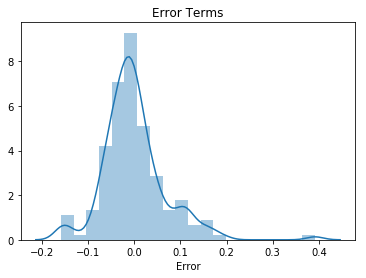

In [68]:
sns.distplot((y_train - y_train_price),bins=20)
plt.xlabel("Error")
plt.title("Error Terms")

Text(0, 0.5, 'y_train - y_train_price')

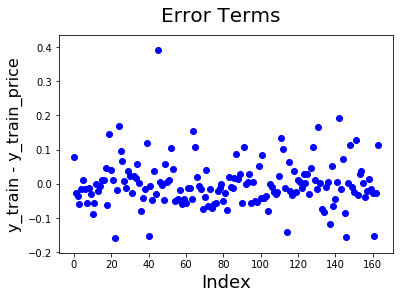

In [69]:
c = [i for i in range(len(y_train.index))]
fig = plt.figure()
plt.scatter(c,y_train - y_train_price, color="blue")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('y_train - y_train_price', fontsize=16) 

We notice a contant variance in the error terms and are somewhat normally distributed.

## 7. Predictions on the Test Set

In [70]:
#Scaling numeric features of test data
cars_test[numCols] = scaler.transform(cars_test[numCols])

In [71]:
#Dividing into X_test and y_test
y_test = cars_test.pop('price')

In [72]:
X_test = cars_test[colsList_10]

# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lm10.predict(X_test_sm)

Text(0, 0.5, 'y_pred')

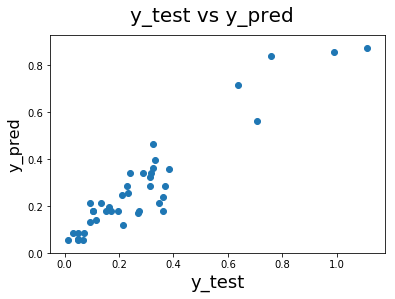

In [73]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)  

## 8. Model Evaluation

In [74]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [75]:
r_squared = r2_score(y_test, y_pred)
r_squared_lm10 = r_squared
r_squared_lm10

0.8757851198215854

The difference is 0.894 - 0.875 ~ 0.019 which is within the range.

In [76]:
lm10.params

const                      -0.102088
carwidth                    0.546625
enginelocation_rear         0.364118
carSegment_luxury_priced    0.288795
enginetype_ohcv             0.077170
drivewheel_rwd              0.075205
dtype: float64

## 9. Inference

<b>The following variables are significant in predicting the price of a car:</b>
- carwidth
- Rear engine locations
- High priced luxury car segment
- engine type ohcv
- drivewheel rwd

The equation for the best fitted line to (predict the price) given by following equation

$ price = -0.102088 + 0.546625 \times  carwidth + 0.364118  \times  enginelocation\_rear + 0.288795 \times carSegment\_luxury\_priced + 0.077170 \times enginetype\_ohcv + 0.075205 \times drivewheel\_rwd $

    
<b> How well those variables describe the price of a car? </b>

    -R-squared:                       0.894
    -Adj. R-squared:                  0.890

    -Almost 89% of the variance is explained by the above variables.

- Also a unit increase in carwidth will impact the price of car by 0.546625 keeping all other variables as constant.
- Also a unit increase in rear enginelocation will impact the price of car by 0.364118 keeping all other variables as constant.
- Similar scenario goes for other variables.
